# The code is split into different parts:
#### 1. Data handling 
#### 2. Tablet Hardness
#### 3. Tablet Height
#### 4. Tablet Friability
#### 5. Output of all the plots

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt

In [2]:
filepath = 'https://raw.githubusercontent.com/MrHexeberg/AI-medical-project/refs/heads/main/Tablet%20examination%20-%20Munka1.csv'

df = pd.read_csv(filepath, skiprows = 1)
df = df.drop('Measurement', axis = 1)

df.head()


,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
0,732,146,157,81.9,5.23,0.318
1,851,110,180,91.0,4.82,0.200
2,562,197,133,59.6,5.79,0.466
3,923,122,189,96.3,4.66,0.181
4,688,154,112,74.0,5.37,0.332


In [3]:
df.describe()

,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,711.440000,151.470000,151.390000,75.675000,5.296900,0.309340
std,149.542962,32.235076,31.828421,15.275096,0.473478,0.108533
min,504.000000,100.000000,100.000000,52.700000,4.500000,0.102000
25%,579.750000,118.750000,120.000000,64.375000,4.840000,0.190000
50%,676.500000,155.500000,148.000000,72.950000,5.395000,0.336000
75%,815.500000,182.250000,184.250000,88.825000,5.652500,0.410250
max,998.000000,198.000000,200.000000,100.000000,5.970000,0.466000


In [4]:
df.isnull().sum()

Press Force (kg)             0
Motor Speed (tablets/min)    0
Particle Size (μm)           0
Tablet Hardness (N)          0
Tablet Height (mm)           0
Tablet Friability (%)        0
dtype: int64

In [5]:
X = df[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = df[['Tablet Hardness (N)',	'Tablet Height (mm)',	'Tablet Friability (%)']]

In [6]:
# Splitting the dataset into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Setup Tablet Hardness

In [8]:
# Model Hardness
model_hardness = Sequential(
    [
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation = "linear")   # Output neuron
    ]
)


c:\Users\thebo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Model Hardness
model_hardness.compile(optimizer=Adam(learning_rate=0.1), loss='mse')


In [10]:
# Making two arrays of the y_train and y_test values for the tablet hardness
y_train_hardness = np.array([x[0] for x in y_train.values])
y_test_hardness = np.array([x[0] for x in y_test.values])


### Training the model for Tablet Hardness

In [11]:
history_hardness = model_hardness.fit(X_train_scaled, y_train_hardness,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1                    
                    )


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5245.9619 - val_loss: 572.1279
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4956.4458 - val_loss: 2253.1196
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1548.4944 - val_loss: 3117.0012
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3632.8572 - val_loss: 4843.0220
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4629.5132 - val_loss: 5186.5474
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4834.3452 - val_loss: 5123.5742
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4594.8564 - val_loss: 4537.0127
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4084.2061 - val_loss: 2789.5286
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2678.6619 - val_loss: 873.5219
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1142.5609 - val_loss: 4149.5796
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1566.6494 - val_loss: 913.2236
Epoch 12/10

In [12]:
# Evaluation of the model for tablet hardness
y_pred_hardness = model_hardness.predict(X_test_scaled)
rmse_hardness = root_mean_squared_error(y_test_hardness, y_pred_hardness)
r2_hardness = r2_score(y_test_hardness, y_pred_hardness)
print('rmse: ', rmse_hardness)
print('r2 score: ', r2_hardness)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
rmse:  1.5877553556364203
r2 score:  0.988650294531846


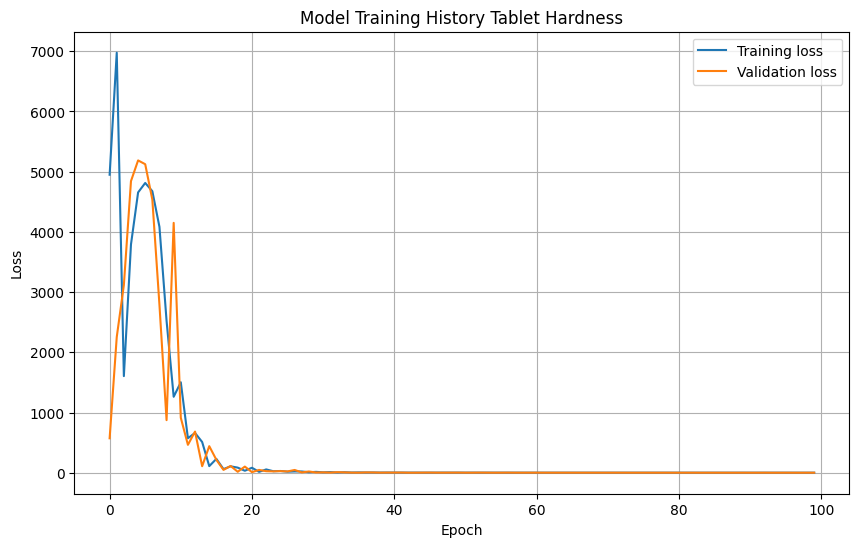

In [13]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(history_hardness.history['loss'], label = 'Training loss')
plt.plot(history_hardness.history['val_loss'], label = 'Validation loss')
plt.title('Model Training History Tablet Hardness')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()


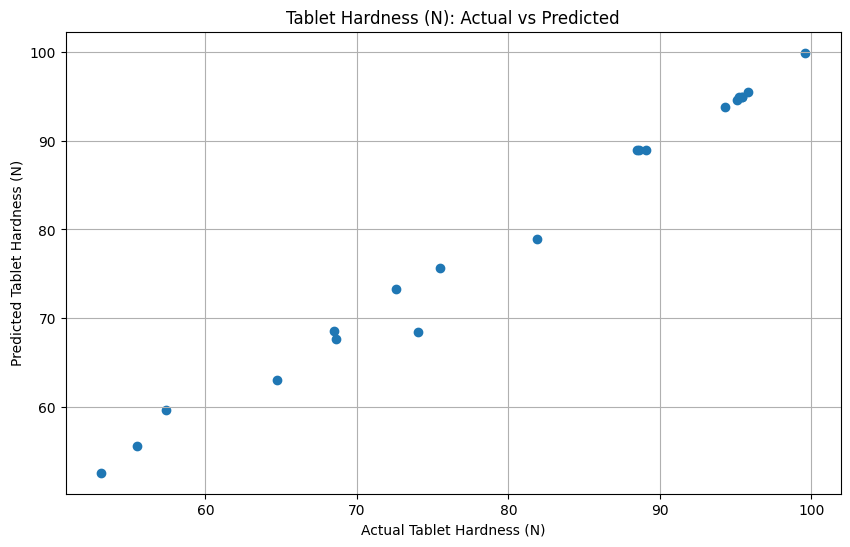

In [14]:
plt.figure(figsize=(10,6))
col = 'Tablet Hardness (N)'
plt.scatter(y_test[col], y_pred_hardness)
plt.xlabel(f'Actual {col}')
plt.ylabel(f'Predicted {col}')
plt.title(f'{col}: Actual vs Predicted')
plt.grid()

# 3. Tablet Height

In [15]:
# Model Height
model_height = Sequential(
    [
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation = "linear")   # Output neuron
    ]
)


c:\Users\thebo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Model Height
model_height.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [17]:
# Making two arrays of the y_train and y_test values for the tablet height
y_train_height = np.array([x[1] for x in y_train.values])
y_test_height = np.array([x[1] for x in y_test.values])

### Training the model for Tablet Height

In [18]:
history_height = model_height.fit(X_train_scaled, y_train_height,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1                    
                    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 20.8414 - val_loss: 170.2074
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 80.6659 - val_loss: 15.1525
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.0993 - val_loss: 17.9902
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.8912 - val_loss: 12.9253
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.6098 - val_loss: 12.6791
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.0442 - val_loss: 1.0874
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9345 - val_loss: 3.2966
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6904 - val_loss: 2.6235
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7914 - val_loss: 1.9689
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7567 - val_loss: 0.3319
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6393 - val_loss: 1.6351
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.56

In [19]:
# Evaluation of the model for tablet height
y_pred_height = model_height.predict(X_test_scaled)
rmse_height = root_mean_squared_error(y_test_height, y_pred_height)
r2_height = r2_score(y_test_height, y_pred_height)
print('rmse: ', rmse_height)
print('r2 score: ', r2_height)

# y_pred_he

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
rmse:  0.0463954827248283
r2 score:  0.990216112689746


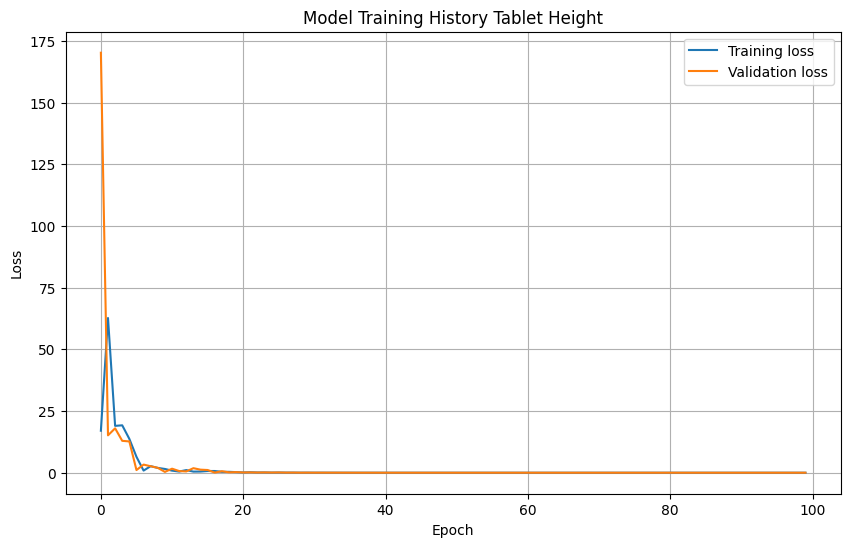

In [20]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(history_height.history['loss'], label = 'Training loss')
plt.plot(history_height.history['val_loss'], label = 'Validation loss')
plt.title('Model Training History Tablet Height')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

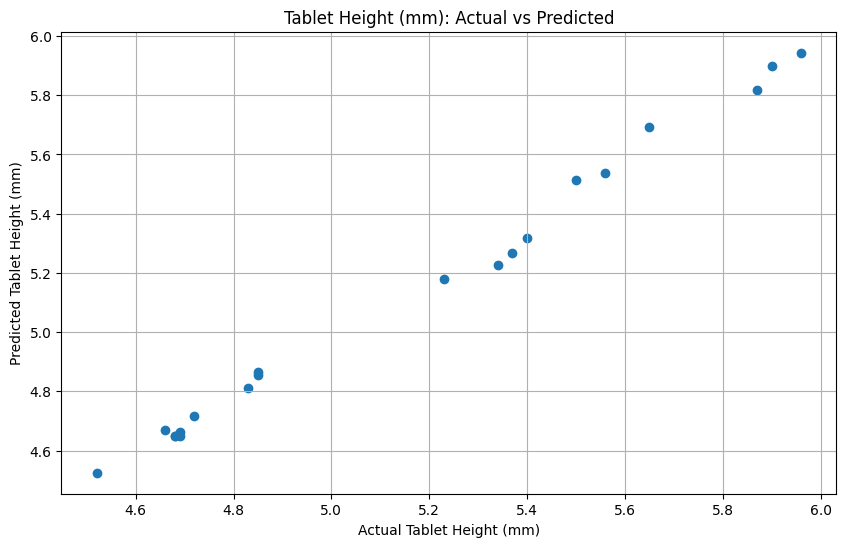

In [21]:
plt.figure(figsize=(10,6))
col = 'Tablet Height (mm)'
plt.scatter(y_test[col], y_pred_height)
plt.xlabel(f'Actual {col}')
plt.ylabel(f'Predicted {col}')
plt.title(f'{col}: Actual vs Predicted')
plt.grid()

# Setup Tablet Friability

In [64]:
# Model Friability
model_friability = Sequential(
    [
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation = "linear")   # Output neuron
    ]
)

c:\Users\thebo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model_friability.compile(optimizer=Adam(learning_rate=0.01), loss='mape')

### The scaling factor is used because the neural network has a hard time with the small numbers

In [ ]:
scaling_factor = 10

In [87]:
# Making two arrays of the y_train and y_test values for the tablet friability
y_train_friability = np.array([x[2] for x in y_train.values]) * scaling_factor
y_test_friability = np.array([x[2] for x in y_test.values]) * scaling_factor

### Training the model for Tablet Friability

In [88]:
history_friability = model_friability.fit(X_train_scaled, y_train_friability,
                    epochs=100,
                    batch_size=48,
                    validation_split=0.2,
                    verbose=1                    
                    )

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 2.4385 - val_loss: 4.5776
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.7351 - val_loss: 8.5139
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7225 - val_loss: 10.3440
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.0079 - val_loss: 6.3348
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7644 - val_loss: 4.0205
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5219 - val_loss: 4.4183
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3923 - val_loss: 4.1704
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9895 - val_loss: 3.3891
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9459 - val_loss: 2.8952
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.3100 - val_loss: 2.1779
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4562 - val_loss: 2.7928
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9573 - val_loss: 2.0403


In [89]:
# Evaluation of the model for tablet friability
y_pred_friability = model_friability.predict(X_test_scaled) / scaling_factor
rmse_friability = root_mean_squared_error(y_test_friability, y_pred_friability)
r2_friability = r2_score(y_test_friability, y_pred_friability)

print('rmse: ', rmse_friability)
print('r2 score: ', r2_friability)

# y_pred_friability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
rmse:  5.629497453998742
r2 score:  -6.202497612991334


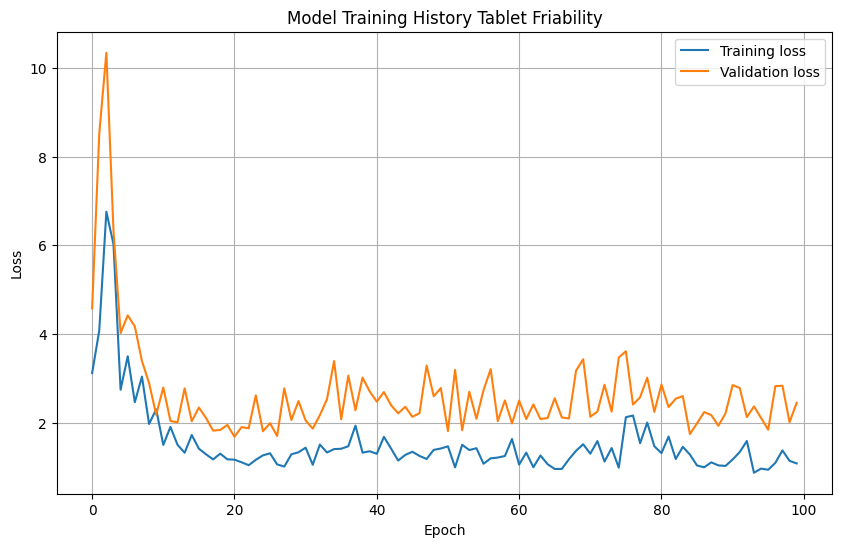

In [91]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(history_friability.history['loss'], label = 'Training loss')
plt.plot(history_friability.history['val_loss'], label = 'Validation loss')
plt.title('Model Training History Tablet Friability')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

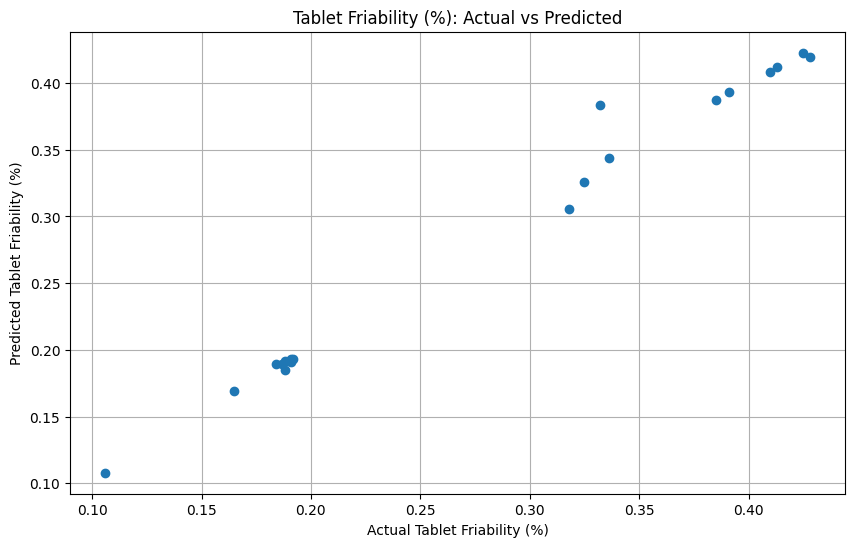

In [93]:
plt.figure(figsize=(10,6))
col = 'Tablet Friability (%)'
plt.scatter(y_test[col], y_pred_friability)
plt.xlabel(f'Actual {col}')
plt.ylabel(f'Predicted {col}')
plt.title(f'{col}: Actual vs Predicted')
plt.grid()

# Output of the models

#### Making an array for each of the output parameters to store in a dataframe

In [42]:
hardness = np.zeros(len(y_pred_hardness))
height = np.zeros(len(y_pred_height))
friability = np.zeros(len(y_pred_friability))

for i in range(0, len(y_pred_hardness)):
    hardness[i] = y_pred_hardness[i][0]
    height[i] = y_pred_height[i][0]
    friability[i] = y_pred_friability[i][0]

# friability

In [43]:

pred_df = pd.DataFrame({'Tablet Hardness (N)': hardness,
                          'Tablet Height (mm)': height,
                          'Tablet Friability (%)': friability})

pred_df

,Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
0,95.493050,4.670585,0.170847
1,93.827789,4.716714,0.165900
2,94.931534,4.648908,0.180838
3,73.267776,5.319177,0.341296
4,94.939178,4.663446,0.179186
5,55.568176,5.897954,0.423152
6,68.564720,5.513702,0.389383
7,67.657730,5.536060,0.391945
8,88.972771,4.864410,0.195168
9,78.950363,5.177809,0.305038


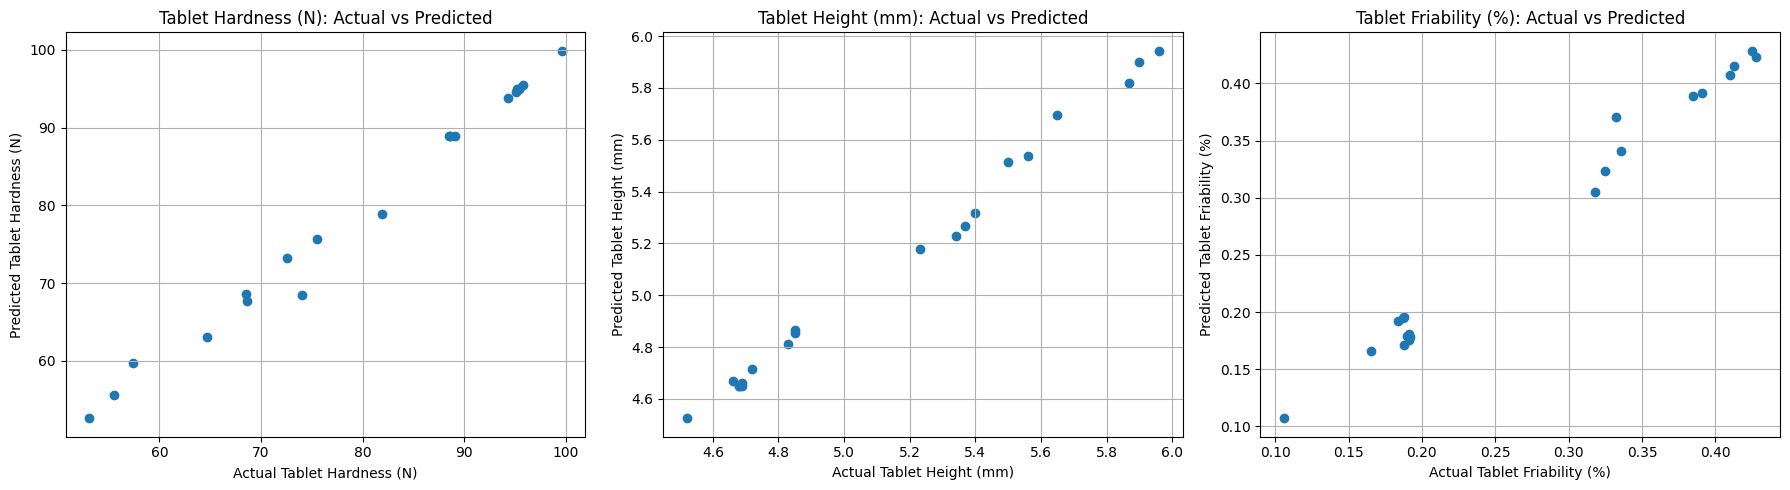

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i, col in enumerate(y.columns):
    # print(i, col)
    ax[i].scatter(y_test[col], pred_df[col])
    ax[i].set_xlabel(f'Actual {col}')
    ax[i].set_ylabel(f'Predicted {col}')
    ax[i].set_title(f'{col}: Actual vs Predicted')
    ax[i].grid()
plt.tight_layout()


In [45]:
# Scores
print('Scores:\n')

print('Tablet Hardness Scores:')
print('rmse:', rmse_hardness)
print('r2 score:', r2_hardness)

print('\nTablet Height')
print('rmse:', rmse_height)
print('r2 score:', r2_height)

print('\nTablet Friability')
print('rmse:', rmse_friability)
print('r2 score:', r2_friability)

Scores:

Tablet Hardness Scores:
rmse: 1.5877553556364203
r2 score: 0.988650294531846

Tablet Height
rmse: 0.0463954827248283
r2 score: 0.990216112689746

Tablet Friability
rmse: 2.667217192506951
r2 score: -5.467264512218346
